In [ ]:
pip install dmba

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots
from dmba import classificationSummary, gainsChart
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB

from sklearn import decomposition #pca
from sklearn.preprocessing import StandardScaler # Standardization

from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from sklearn.linear_model import LogisticRegression #Logistic Model

from sklearn.model_selection import train_test_split # Splitting into train and test

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx




In [ ]:
cardio_df = pd.read_csv('cardio_train.csv',delimiter=';')

In [ ]:
cardio_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
cardio_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
cardio_df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
variables_with_null = [var for var in cardio_df.columns if cardio_df[var].isnull().sum()>0]
if variables_with_null:
    print('Variables with Null Values {}'.format(variables_with_null))
else:
    print('Dataset contains no Null Values')

Dataset contains no Null Values


In [ ]:
duplicate_count = cardio_df.duplicated().sum()
if duplicate_count:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_count))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


In [ ]:
duplicate_data = cardio_df[cardio_df.duplicated(keep=False)]

In [ ]:
# show the duplicate data:

duplicate_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
# Removing the duplicate rows

In [ ]:
cardio_df.drop_duplicates(keep='first', inplace= True)
print('Total {} number of records remaining with {} variables'.format(cardio_df.shape[0], cardio_df.shape[1]))

Total 70000 number of records remaining with 13 variables


In [ ]:
#From the dataset continuous variables are age, height, weight, ap_hi, ap_lo

In [ ]:
cardio_df['years_old'] = (cardio_df['age'] / 365).round().astype('int')
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years_old
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


<Axes: xlabel='height', ylabel='weight'>

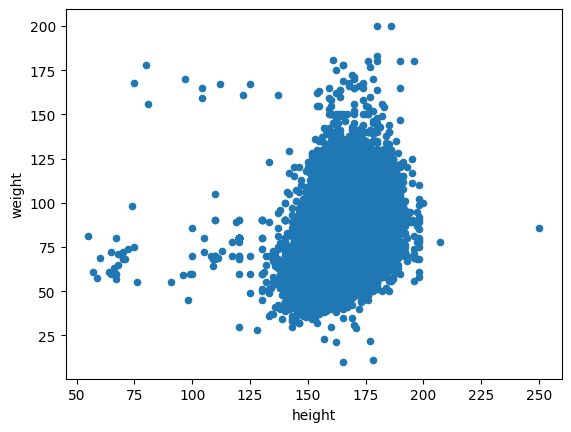

In [ ]:
#check for outliers

# using scatter plot as well
cardio_df.columns

cardio_df.plot.scatter(x = 'height', y = 'weight', legend = False)

In [ ]:
#box chart

fig = go.Figure()

fig.add_trace(go.Box(x=cardio_df['height'], name = 'Height', boxpoints='outliers',))
fig.add_trace(go.Box(x=cardio_df['weight'], name = 'Weight', boxpoints='outliers',))

fig.update_layout(title_text="Box Plot for Weight and Height with Outliers")
fig.show()

<Axes: >

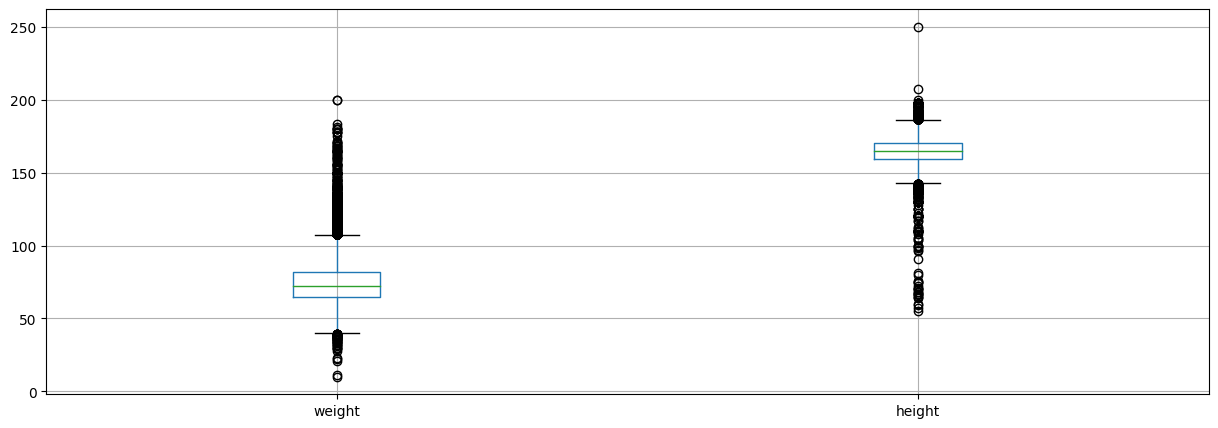

In [ ]:
plt.figure(figsize=(15,5))
cardio_df.boxplot(['weight','height'])

In [ ]:
# # The interquartile range is the distance between the third and the first quartile i.e. : IQR = Q3- Q1
# Outliers = Q1 – 1.5 IQR OR Outliers = Q3 + 1.5 IQR

def find_outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 5th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 95th percentile of the data of the given feature
        # print(f'Feature: {each_feature}-------------')
        IQR = Q3-Q1 #Interquartile Range
        print(f'Percentiles: {Q1}, {Q3}, IQR={IQR}')
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
find_outliers(cardio_df[['height', 'weight']])

Percentiles: 159.0, 170.0, IQR=11.0
For the feature height, No of Outliers is 519
Percentiles: 65.0, 82.0, IQR=17.0
For the feature weight, No of Outliers is 1819


In [ ]:
# Removing the outliers
cardio_cleaned_df = cardio_df.copy()
for x in ['height', 'weight']:
  Q1 = cardio_df[x].quantile(0.05) # 5th percentile of the data of the given feature
  Q3 = cardio_df[x].quantile(0.95)  # 95th percentile of the data of the given feature
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  cardio_cleaned_df = cardio_cleaned_df[(cardio_cleaned_df[x] >= lower) & (cardio_cleaned_df[x] <= upper)]

In [ ]:
cardio_cleaned_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years_old
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


<Axes: xlabel='ap_hi', ylabel='ap_lo'>

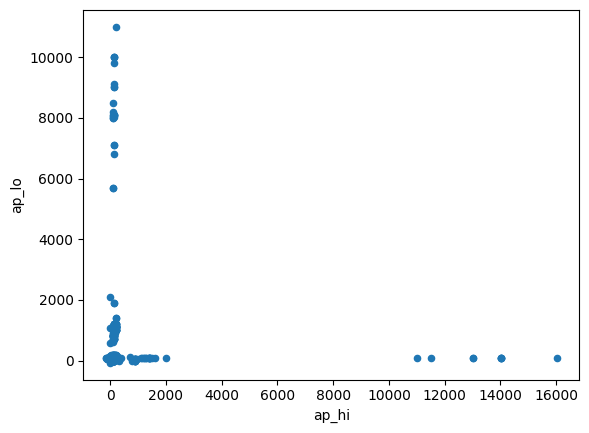

In [ ]:
# checking outliers in blood pressure ap_hi and ap_lo

cardio_df.plot.scatter(x = 'ap_hi', y = 'ap_lo', legend = False)
# sns.jointplot(x='ap_hi', y='ap_lo', data=cardio_df);

# cardio_df.boxplot(['ap_lo','ap_hi'])

# fig.add_trace(go.Box(x=cardio_df['ap_lo'], name = 'ap_lo', boxpoints='outliers',))

# fig.update_layout(title_text="Box Plot ap_hi with Outliers")
# fig.show()

In [ ]:
# Outliers in blood pressure ap_hi and ap_lo
outliers_check = len(cardio_df[(cardio_df["ap_hi"]>=180) | (cardio_df["ap_lo"]>=120) | (cardio_df["ap_lo"] < 0) | (cardio_df["ap_hi"] < 0) | (cardio_df["ap_hi"]<cardio_df["ap_lo"])])

print(f'we have total {outliers_check} outliers')
print(f'percent missing: {round(outliers_check/len(cardio_df)*100, 1)}%')



we have total 2256 outliers
percent missing: 3.2%


In [ ]:
# Removing outliers in blood pressure ap_hi and ap_lo

cardio_cleaned_df = cardio_cleaned_df[(cardio_cleaned_df['ap_hi']>=0) & (cardio_cleaned_df['ap_lo']>=0)]
cardio_cleaned_df = cardio_cleaned_df[ (cardio_cleaned_df['ap_lo'] <= 120) & (cardio_cleaned_df['ap_hi'] <= 180) ]  #remove extreme data points
cardio_cleaned_df = cardio_cleaned_df[ (cardio_cleaned_df['ap_lo'] < cardio_cleaned_df['ap_hi']) ]  #remove systolic higher than diastolic

print('Total {} datapoints remaining with {} features'.format(cardio_cleaned_df.shape[0], cardio_cleaned_df.shape[1]))

Total 68363 datapoints remaining with 14 features


In [ ]:
cardio_cleaned_df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years_old
count,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000,68363.000000
mean,49969.109504,19461.272428,1.348244,164.409622,74.040938,126.363179,81.143001,1.363208,1.225049,0.087694,0.053084,0.803417,0.493147,53.318184
std,28849.404944,2468.937454,0.476417,7.916137,14.177921,16.072519,9.422194,0.677920,0.571023,0.282851,0.224203,0.397417,0.499957,6.770000
min,0.000000,10798.000000,1.000000,113.000000,11.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,24989.500000,17655.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50009.000000,19699.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74867.500000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,207.000000,167.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [ ]:
for x in ['ap_hi', 'ap_lo']:
  Q1 = cardio_df[x].quantile(0.05) # 5th percentile of the data of the given feature
  Q3 = cardio_df[x].quantile(0.95)  # 95th percentile of the data of the given feature
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  cardio_cleaned_df = cardio_cleaned_df[(cardio_cleaned_df[x] >= lower) & (cardio_cleaned_df[x] <= upper)]

In [ ]:
print("The amount of data lost during preprocessing:", str(round((len(cardio_df) - len(cardio_cleaned_df))/len(cardio_df) * 100,2 ))+"%")
print("Total records", len(cardio_cleaned_df))


The amount of data lost during preprocessing: 2.4%
Total records 68319


In [ ]:
duplicate_sum = cardio_cleaned_df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


Data cleaning ends here.

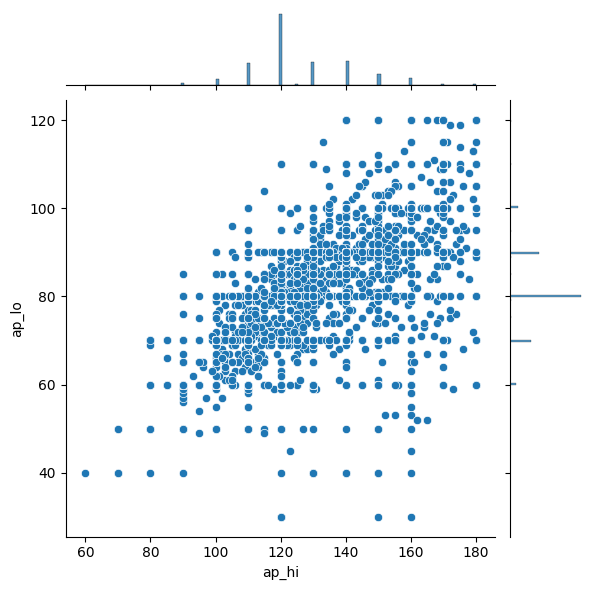

In [ ]:
sns.jointplot(x='ap_hi', y='ap_lo', data=cardio_cleaned_df);

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=cardio_cleaned_df['years_old'], name = 'years_old'))
fig.show()

Most of the people in dataset belongs to 40 to 60 age group
We have an outlier with age as 29 (smallest value) but let's skip that.
Maximun age in our Dataset is 64.

In [ ]:
cardio_cleaned_df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
# calculating the patient BMI (Body Mass Index)
cardio_cleaned_df['BMI'] = round(cardio_cleaned_df['weight']/((cardio_cleaned_df['height']/100)**2),1)
cardio_cleaned_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years_old,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.5
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.0


<Axes: >

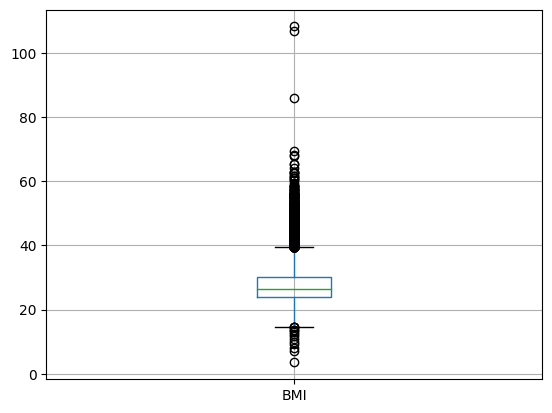

In [ ]:
cardio_cleaned_df.boxplot('BMI')

In [ ]:
#Filtering out the extreme values  of BMI data according to BMI chart above
cardio_cleaned_df = cardio_cleaned_df[ (cardio_cleaned_df['BMI'] < 60) & (cardio_cleaned_df['BMI'] > 10)]

In [ ]:
#Dataset after cleaning
print(f'Number of rows of cardio dataset after data preprocessing: {len(cardio_cleaned_df)}')
print(f'Data removed: {(len(cardio_df) - len(cardio_cleaned_df))/len(cardio_df) * 100}%')

Number of rows of cardio dataset after data preprocessing: 68295
Data removed: 2.435714285714286%


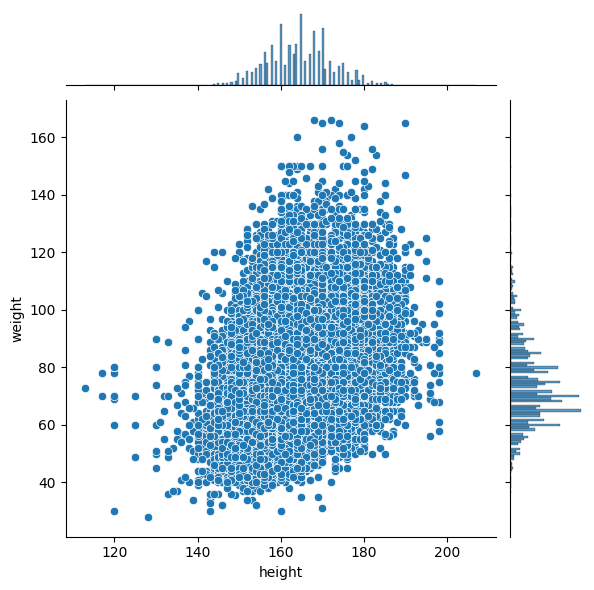

In [ ]:
# Plotting graphs on cleaned data set

sns.jointplot(x='height', y='weight', data=cardio_cleaned_df);

<Axes: >

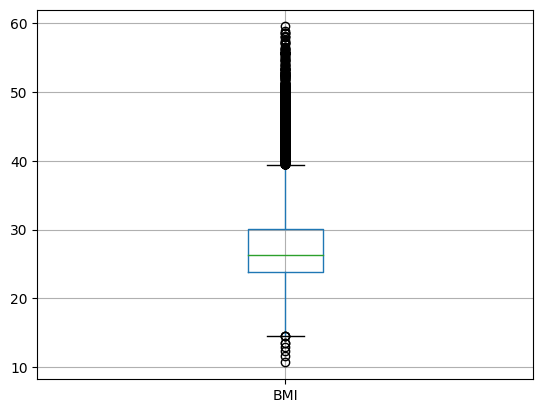

In [ ]:
#After data cleaning
cardio_cleaned_df.boxplot('BMI')

Text(0.5, 1.0, 'Distribution of Age groups by Target Value')

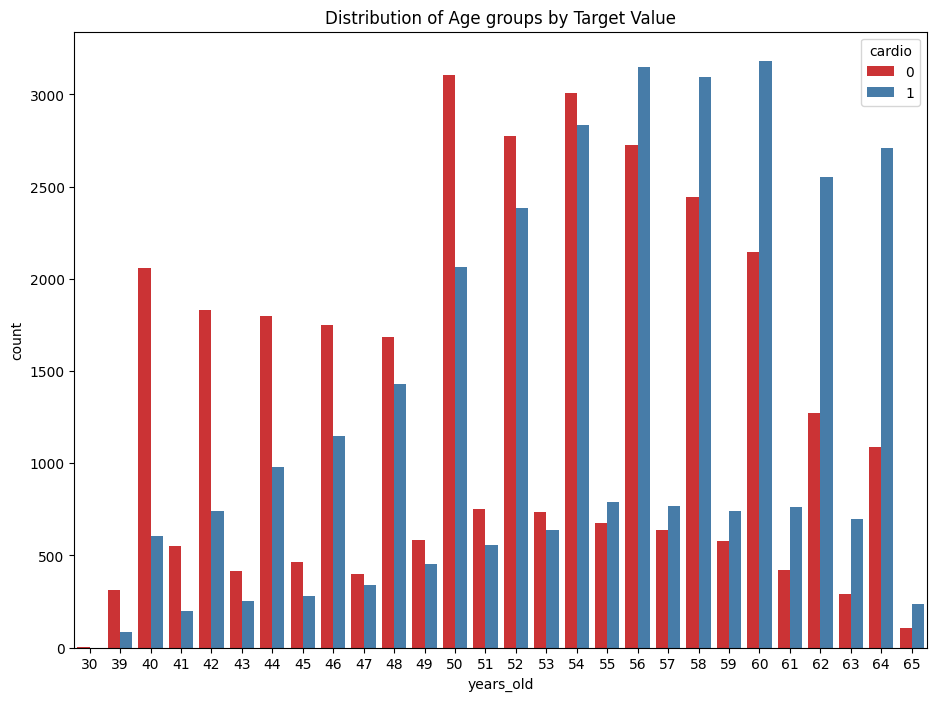

In [ ]:

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='years_old', hue='cardio', data = cardio_cleaned_df, palette="Set1");
plt.title('Distribution of Age groups by Target Value')


It can be observed that people over 55 of age are more exposed to CVD.

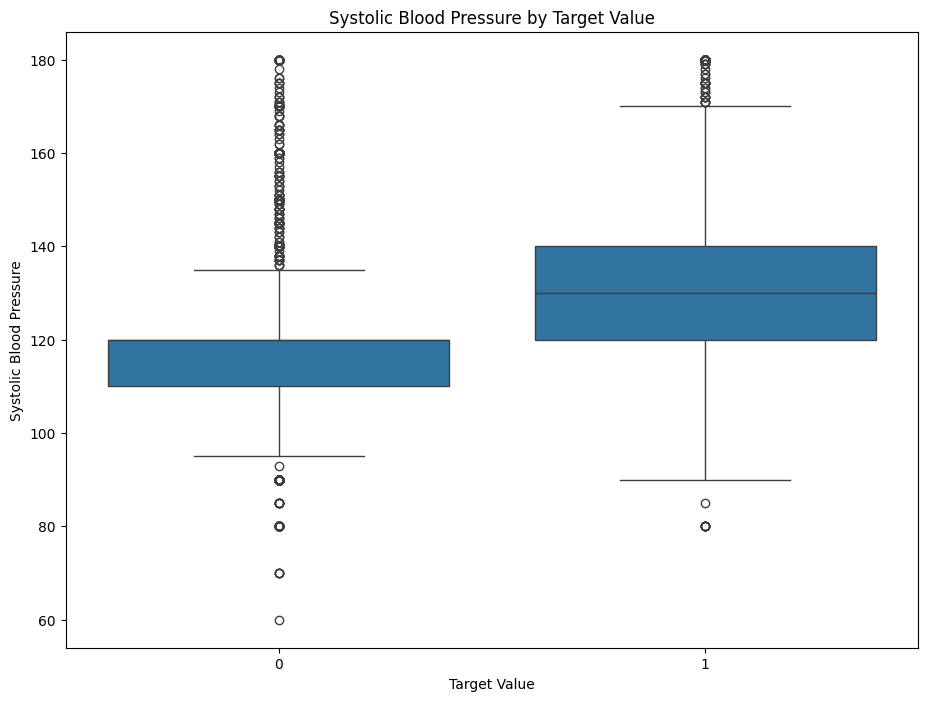

In [ ]:
# plt.figure(figsize=(8, 6))

# sns.boxplot(x='cardio', y='ap_hi', data=cardio_cleaned_df)
# plt.title('Distribution of Systolic blood pressure by Target Value')

sns.boxplot(x='cardio', y='ap_hi', data=cardio_cleaned_df)
plt.title('Systolic Blood Pressure by Target Value')
plt.xlabel('Target Value')
plt.ylabel('Systolic Blood Pressure')
plt.show()




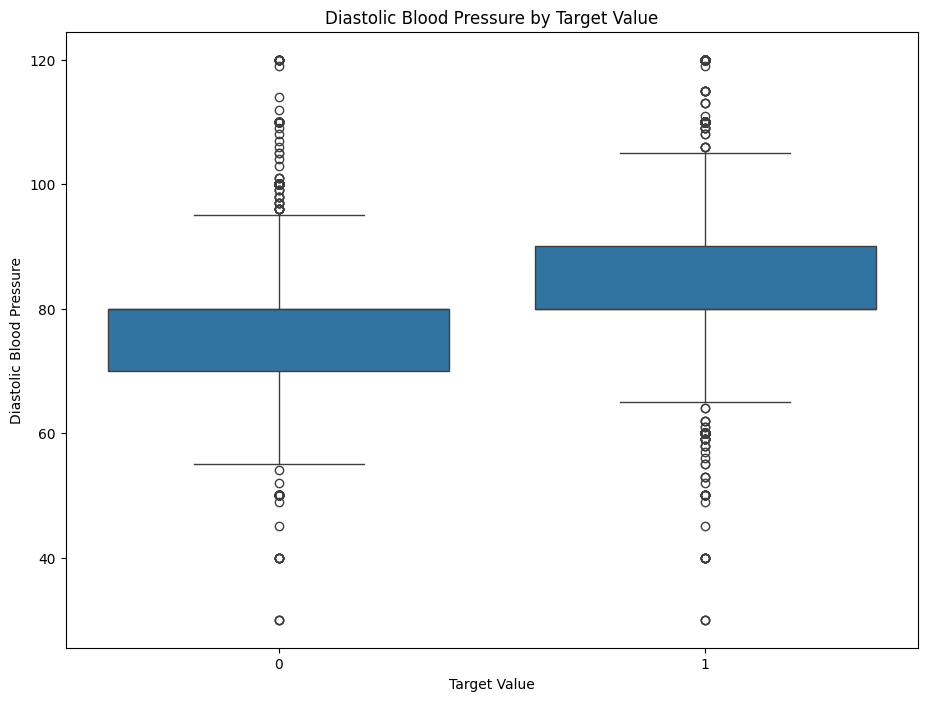

In [ ]:
sns.boxplot(x='cardio', y='ap_lo', data=cardio_cleaned_df)
plt.title('Diastolic Blood Pressure by Target Value')
plt.xlabel('Target Value')
plt.ylabel('Diastolic Blood Pressure')
plt.show()


It can be concluded that :
Maximum level of Diastolic and Systolic blood pressure level for non CVD cases are 80 mmHg and 120 mmHg respectively.

Whereas for CVD cases levels are Diastolic : 90 mmHg, Systolic : 140 mmHg

In [ ]:
fig = go.Figure([go.Pie(labels=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 0]['ap_lo'].value_counts().index.to_list(),values=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 0]['ap_lo'].value_counts().values)])
fig.update_layout(title_text="Distribution of Diastolic blood pressure values for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
fig = go.Figure([go.Pie(labels=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 0]['ap_hi'].value_counts().index.to_list(),values=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 0]['ap_hi'].value_counts().values)])
fig.update_layout(title_text="Distribution of Systolic blood pressure values for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
fig = go.Figure([go.Pie(labels=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 1]['ap_lo'].value_counts().index.to_list(),values=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 1]['ap_lo'].value_counts().values)])
fig.update_layout(title_text="Distribution of Diastolic blood pressure values for  CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
fig = go.Figure([go.Pie(labels=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 1]['ap_hi'].value_counts().index.to_list(),values=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 1]['ap_hi'].value_counts().values)])
fig.update_layout(title_text="Distribution of Systolic blood pressure values for  CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

Conclusion:

Population has highest no of people with 80 mmHg Diastolic Blood Pressure.  


In [ ]:
cardio_cleaned_df.groupby('gender')['height'].mean()

gender
1    161.436361
2    169.987850
Name: height, dtype: float64

In [ ]:
cardio_cleaned_df['gender'].value_counts()


1    44509
2    23786
Name: gender, dtype: int64

In [ ]:
cardio_cleaned_df.groupby('gender')['alco'].sum()


gender
1    1119
2    2506
Name: alco, dtype: int64

In [ ]:
cardio_cleaned_df['cardio'].value_counts(normalize=True)


0    0.506875
1    0.493125
Name: cardio, dtype: float64

In [ ]:
# pd.crosstab(cardio_cleaned_df['cardio'],cardio_cleaned_df['gender'],normalize=True)

cross_tab_val= pd.crosstab(cardio_cleaned_df['cardio'], cardio_cleaned_df['gender'], normalize=True)
print(cross_tab_val)


gender         1         2
cardio                    
0       0.331869  0.175005
1       0.319848  0.173278


In [ ]:
cardio_cleaned_df.isnull().values.any()
cross_tab_val.columns


Int64Index([1, 2], dtype='int64', name='gender')

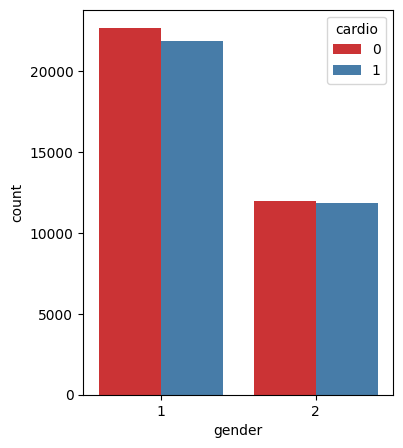

In [ ]:
# rcParams['figure.figsize'] = 11, 8
# sns.countplot(x='gender', hue='cardio', data = cardio_cleaned_df, palette="Set1");

gender = cardio_cleaned_df[cardio_cleaned_df['cardio'] == 1]['gender'].value_counts()
gender
# gender = cardio_cleaned_df['gender'].value_counts()
# print(gender)
rcParams['figure.figsize'] = 4, 5
sns.countplot(x='gender', hue='cardio', data = cardio_cleaned_df, palette="Set1");


In [ ]:
cardio_cleaned_df.groupby('gender')['height'].mean()

gender
1    161.436361
2    169.987850
Name: height, dtype: float64

Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women.

In [ ]:
cardio_cleaned_df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
years_old        int64
BMI            float64
dtype: object

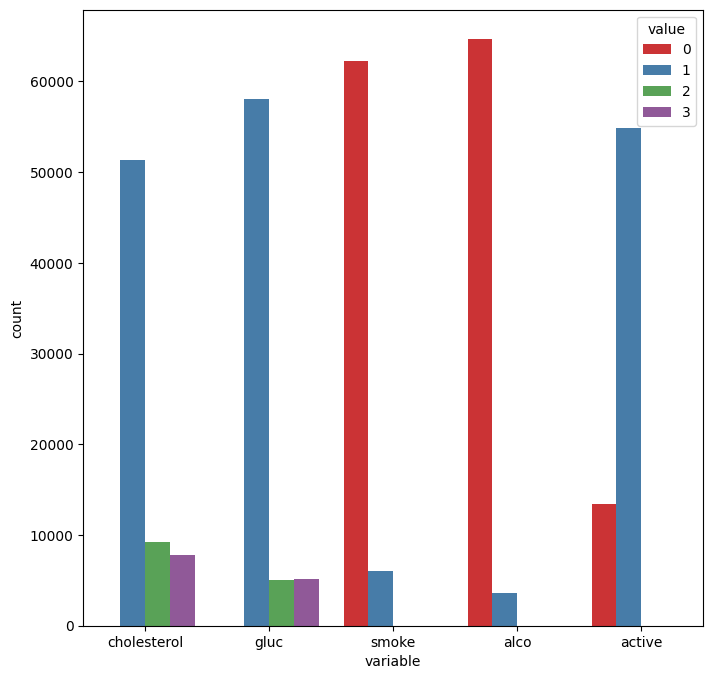

In [ ]:
rcParams['figure.figsize'] = 8, 8

cardio_categorical = cardio_cleaned_df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(cardio_categorical),palette="Set1" );

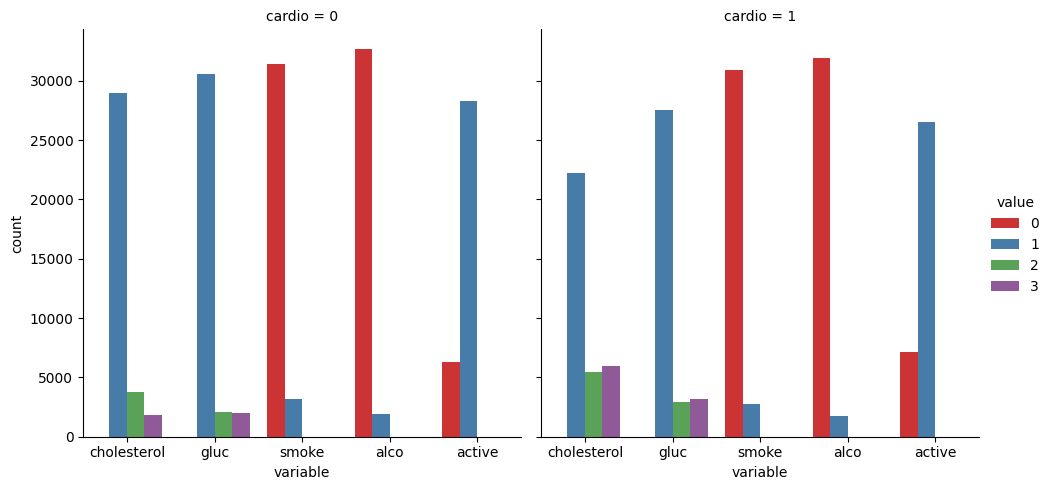

In [ ]:
cardio_long = pd.melt(cardio_cleaned_df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=cardio_long, kind="count", palette="Set1");


In [ ]:
# rcParams['figure.figsize'] = 35, 15
# sns.countplot(x='height', hue='cardio', data = cardio_cleaned_df, palette="Set1");
fig = make_subplots(rows=1, cols=2, subplot_titles=("Height Distribution", "Weight Distribution"))

trace0 = go.Histogram(x=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 1]['height'], name = 'Height')
trace1 = go.Histogram(x=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 1]['weight'], name = 'Weight')


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_xaxes(title_text="Height", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="Weight", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_layout(title_text="For CVD cases", height=700)


fig.show()

In [ ]:
# rcParams['figure.figsize'] = 100, 15
# sns.countplot(x='weight', hue='cardio', data = cardio_cleaned_df, palette="Set1");

fig = make_subplots(rows=1, cols=2, subplot_titles=("Height Distribution", "Weight Distribution"))

trace0 = go.Histogram(x=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 0]['height'], name = 'Height')
trace1 = go.Histogram(x=cardio_cleaned_df[cardio_cleaned_df['cardio'] == 0]['weight'], name = 'Weight')


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_xaxes(title_text="Height", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="Weight", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_layout(title_text="For NON CVD cases", height=700)


fig.show()

The graph shows weight and height does not have significant impact for CVD and non CVD cases.

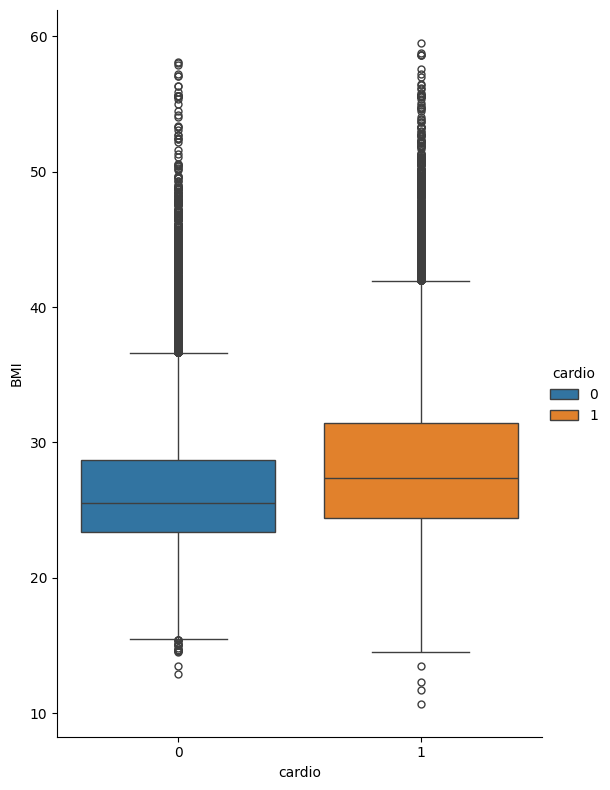

In [ ]:
sns.catplot(x="cardio", y="BMI", hue="cardio", data=cardio_cleaned_df,kind="box", height=8, aspect=.7);

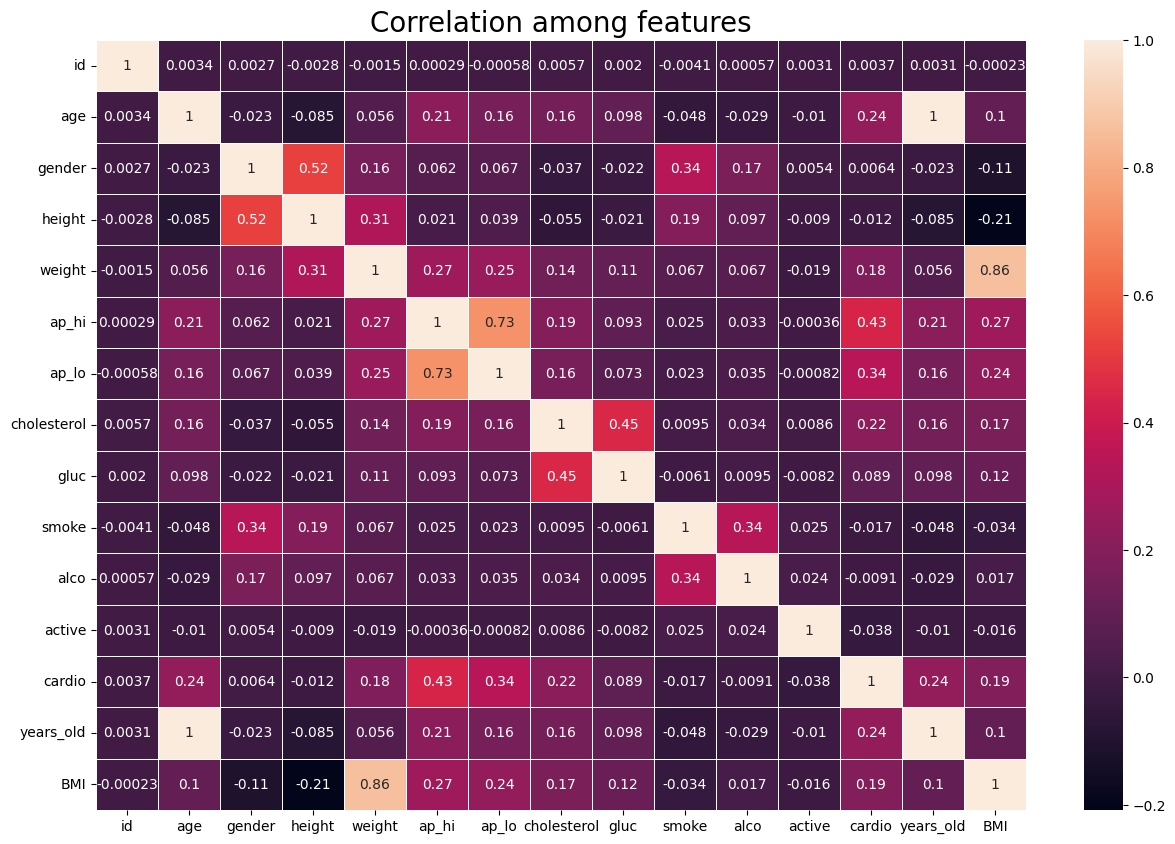

In [ ]:
#Finding correlation between variables

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(cardio_cleaned_df.corr(), annot = True, linewidths=.5)
plt.title('Correlation among features', fontsize = 20)
plt.show()

In [ ]:
#Creating a copy for data scaling
scaled_cardio_df = cardio_cleaned_df.copy()

In [ ]:
X = scaled_cardio_df.drop(['cardio','age','BMI', 'id'], axis =1)
Y = scaled_cardio_df['cardio']

<Axes: >

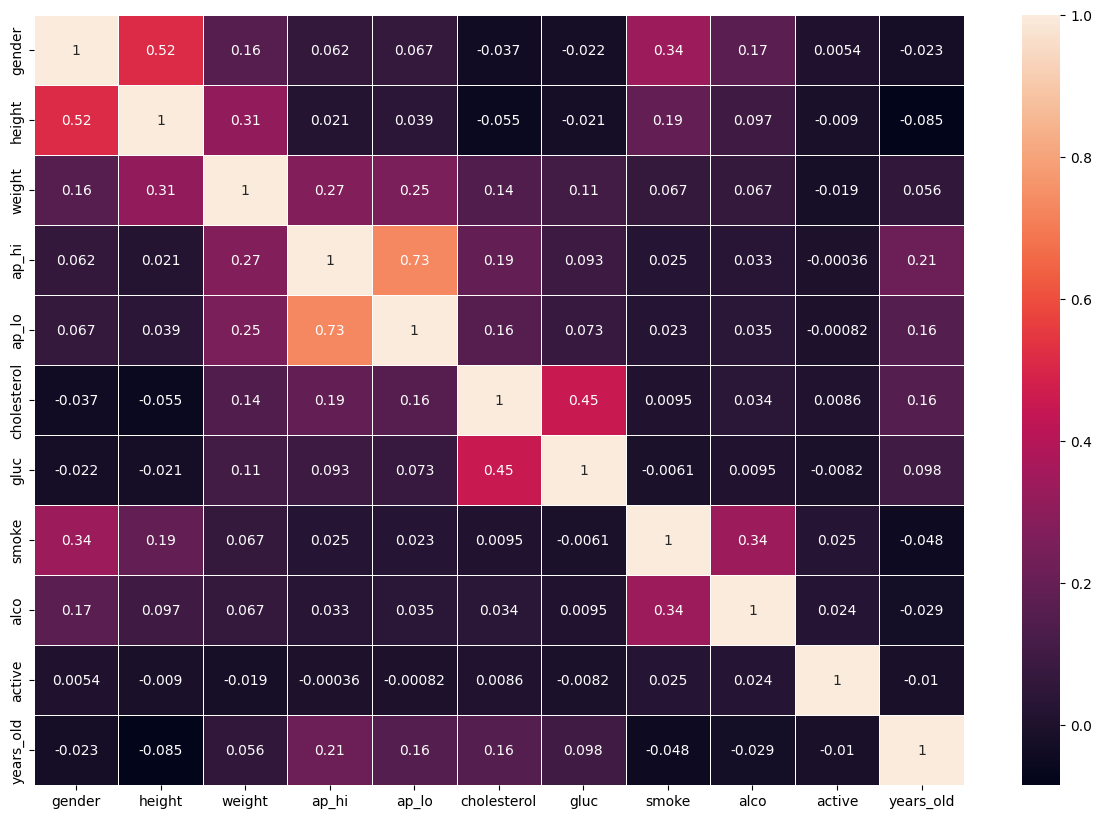

In [ ]:
# X.corr()
sns.heatmap(X.corr(), annot = True, linewidths=.5)


In [ ]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(standard_X, Y, test_size=0.4, random_state=42)

In [ ]:
print("Training data shape:", train_X.shape)
print("Validation data shape:", valid_X.shape)

Training data shape: (40977, 11)
Validation data shape: (27318, 11)


In [ ]:
log_reg_model = LogisticRegression()

log_reg_model.fit(train_X,train_y )

LogisticRegression()

Confusion Matrix (Accuracy 0.7279)

       Prediction
Actual     0     1
     0 10861  2984
     1  4450  9023


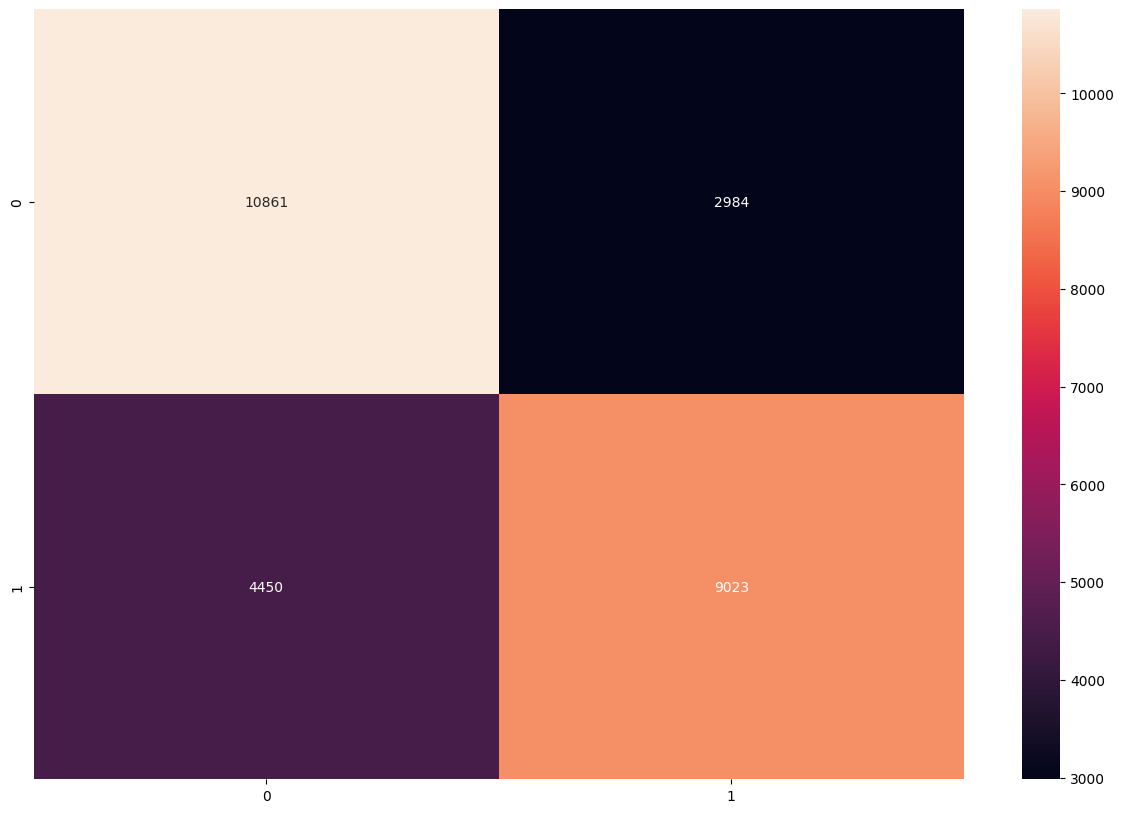

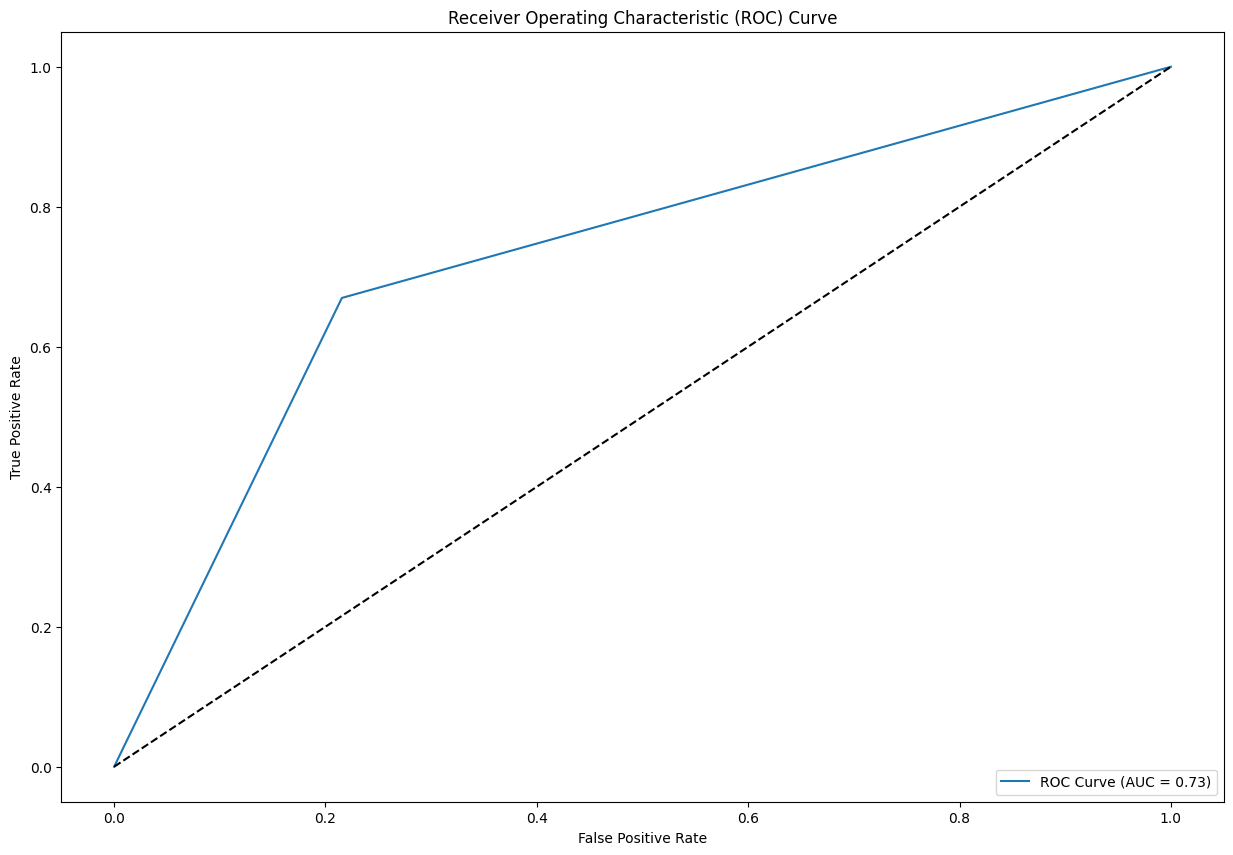

In [ ]:
log_reg_pred = log_reg_model.predict(valid_X)

classificationSummary(valid_y, log_reg_pred)

import seaborn as sns
cm = confusion_matrix(valid_y,log_reg_model.predict(valid_X))
sns.heatmap(cm,annot=True,fmt="d")

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate the ROC AUC score
roc_auc = roc_auc_score(valid_y, log_reg_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(valid_y, log_reg_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# plt.tight_layout()
plt.show()

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(train_X, train_y)

RandomForestClassifier()

Confusion Matrix (Accuracy 0.7060)

       Prediction
Actual    0    1
     0 9918 3927
     1 4104 9369


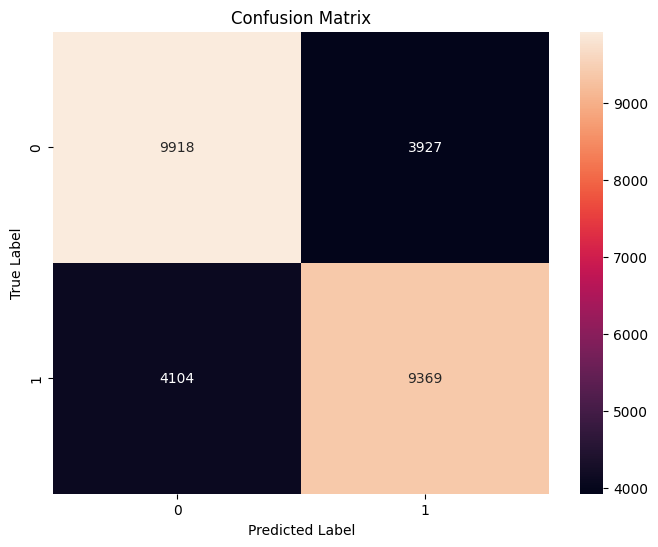

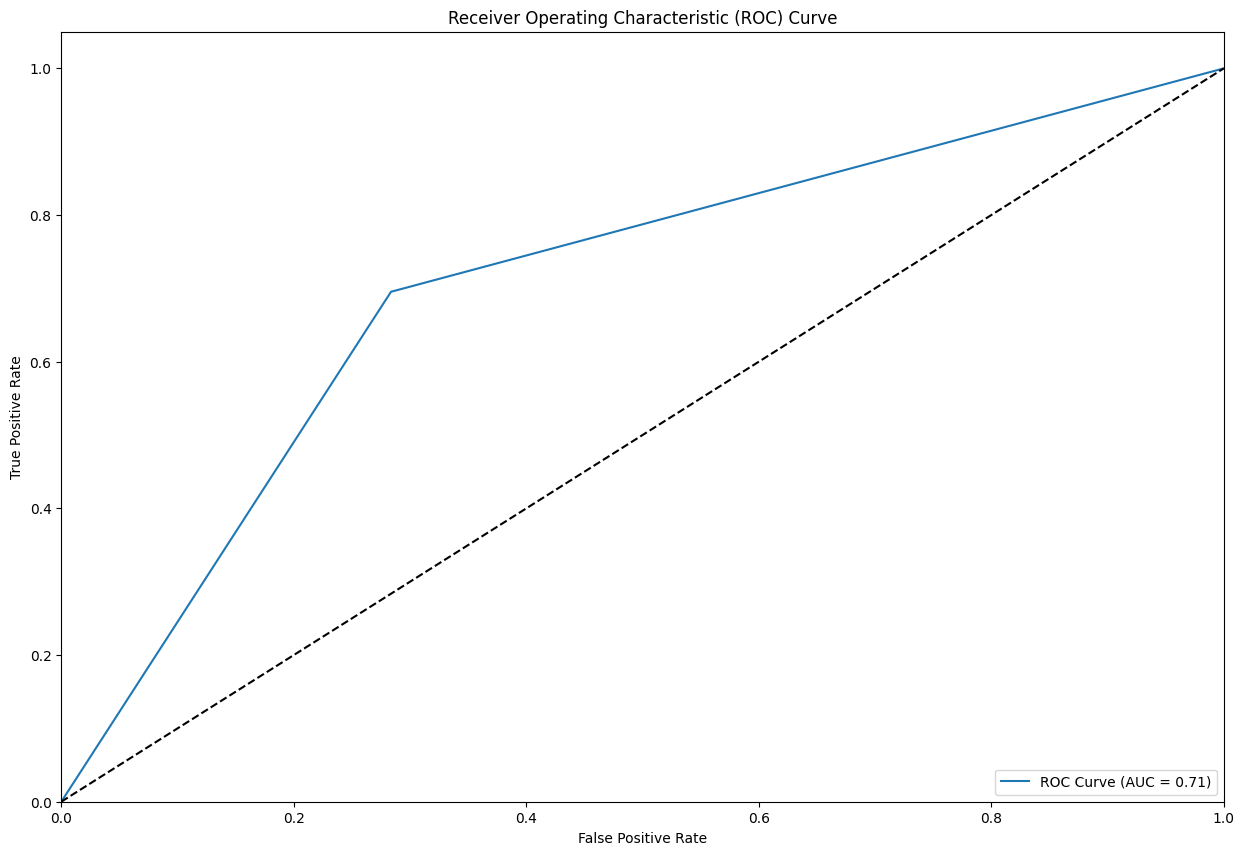

In [ ]:
random_forest_model_pred = random_forest_model.predict(valid_X)
classificationSummary(valid_y, random_forest_model_pred)

cm = confusion_matrix(valid_y, random_forest_model.predict(valid_X))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



# Calculate the ROC AUC score
roc_auc = roc_auc_score(valid_y, random_forest_model_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(valid_y, random_forest_model_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# plt.tight_layout()
plt.show()

Confusion Matrix (Accuracy 0.7263)

       Prediction
Actual     0     1
     0 10159  3686
     1  3790  9683


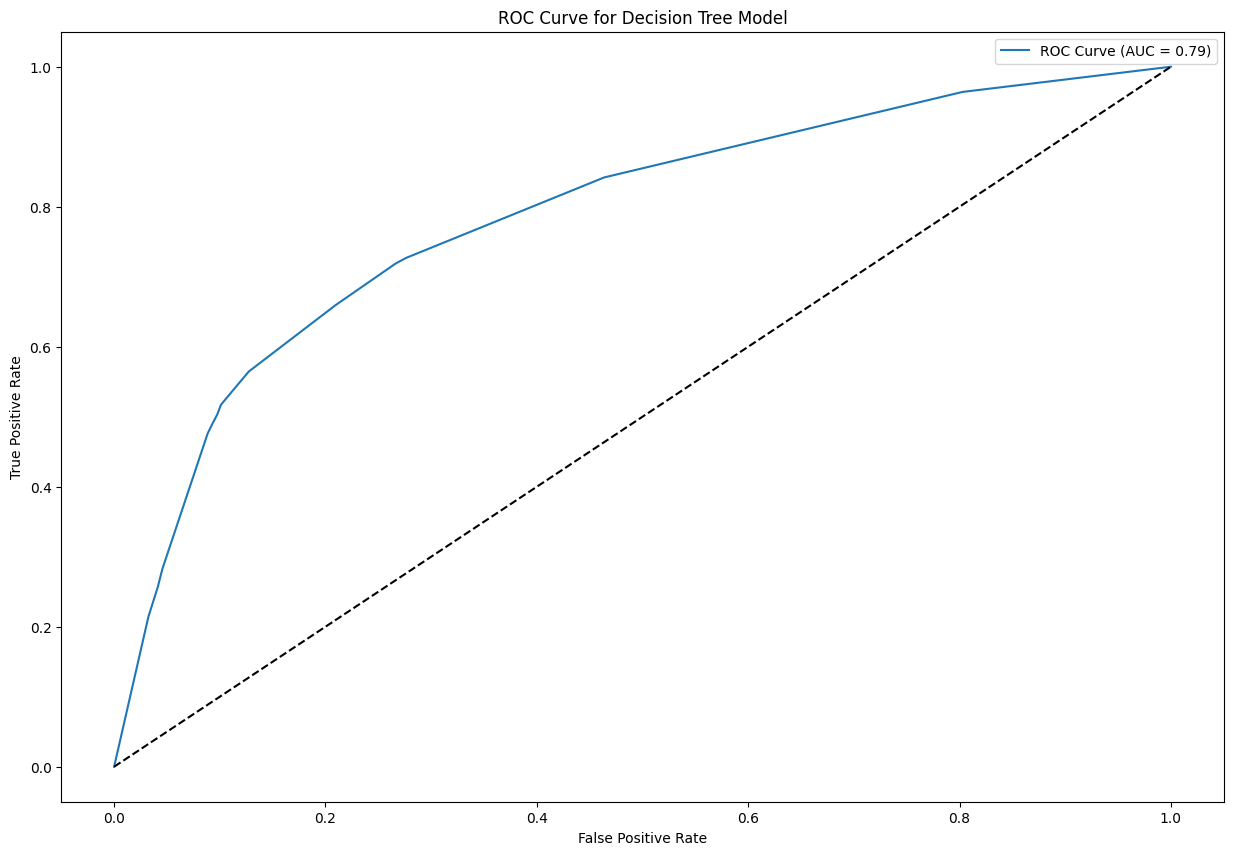

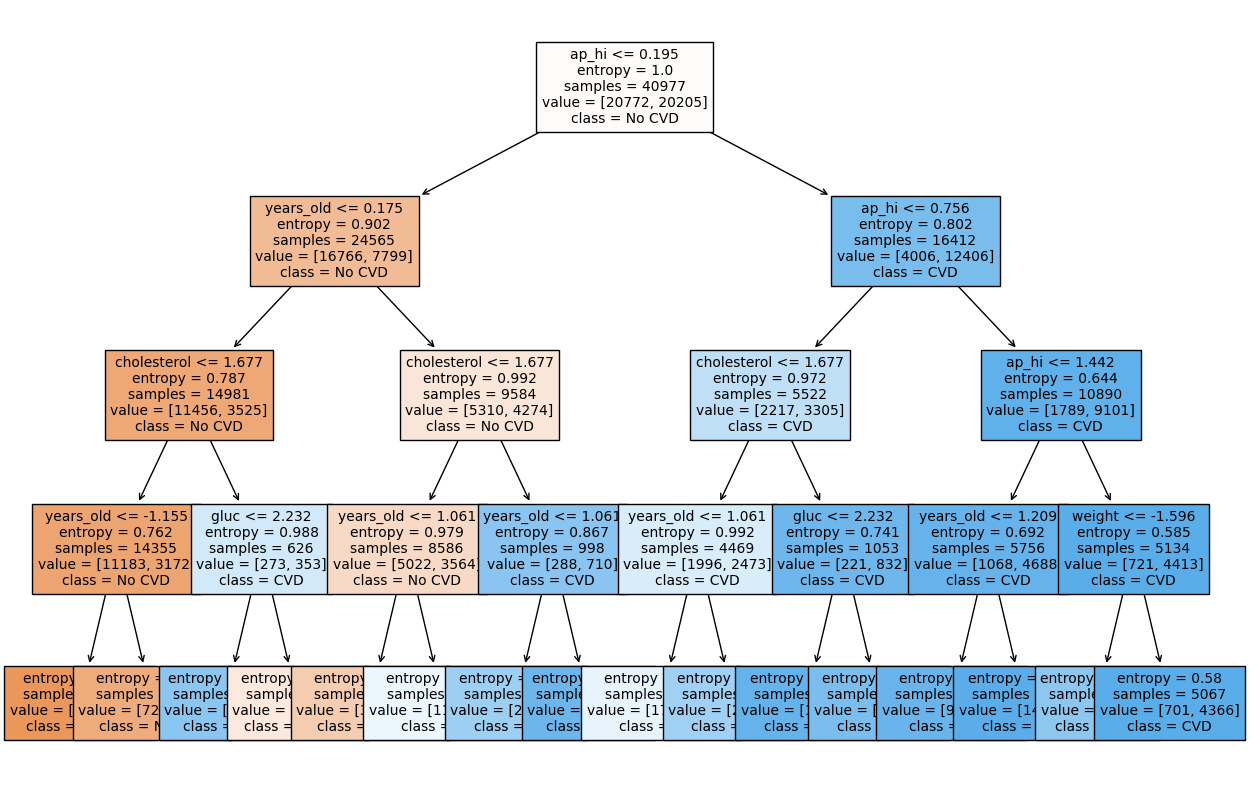

In [ ]:

from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

decision_tree_model.fit(train_X, train_y)

decision_tree_pred = decision_tree_model.predict(valid_X)

classificationSummary(valid_y, decision_tree_pred)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the validation data
y_prob = decision_tree_model.predict_proba(valid_X)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(valid_y, y_prob)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(valid_y, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc='best')
plt.show()
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_model, feature_names=X.columns, class_names=['No CVD', 'CVD'], fontsize=10, filled=True)
# plt.tight_layout()
plt.show()




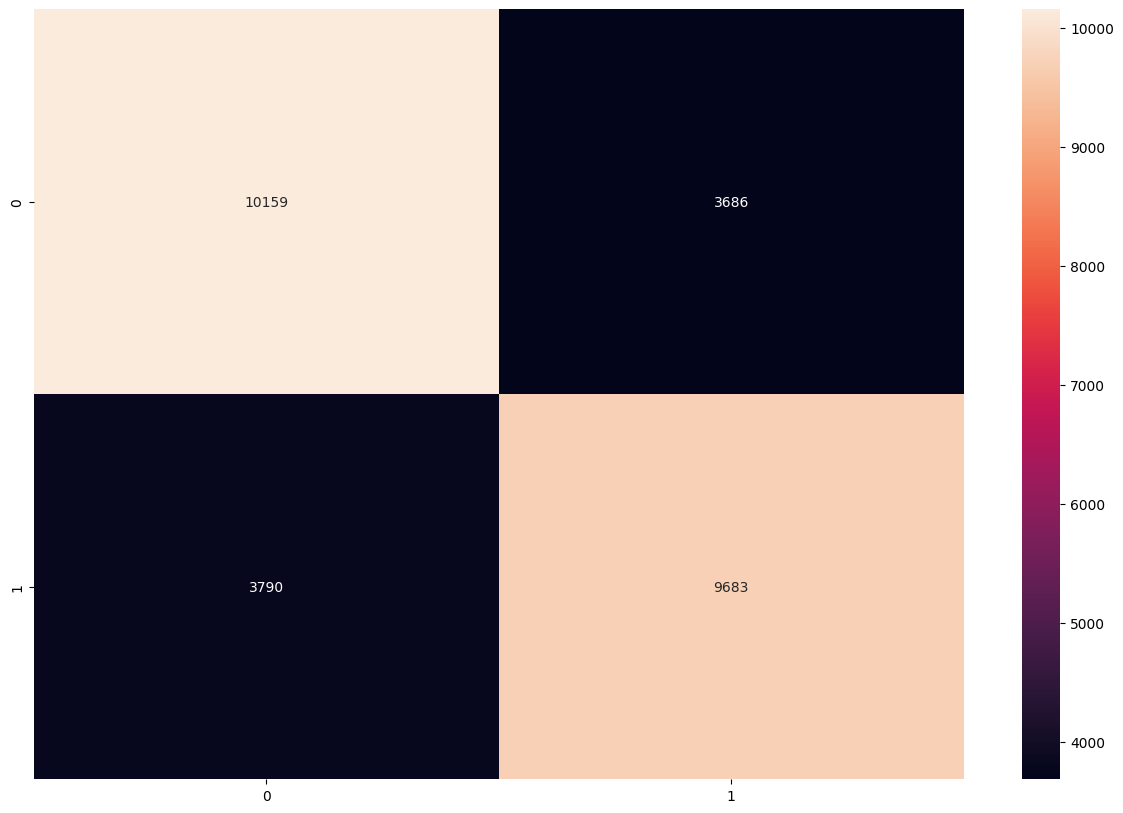

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(valid_y, decision_tree_model.predict(valid_X))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
print("Mean:", cardio_cleaned_df['years_old'].mean())
print("Median:", cardio_cleaned_df['years_old'].median())
print("Mode:", cardio_cleaned_df['years_old'].mode())
print("Standard deviation:", cardio_cleaned_df['years_old'].std())
print("Variance:", cardio_cleaned_df['years_old'].var())
print("Range:", cardio_cleaned_df['years_old'].max() - cardio_cleaned_df['years_old'].min())
print("Minimum:", cardio_cleaned_df['years_old'].min())
print("Maximum:", cardio_cleaned_df['years_old'].max())
print("Q1:", cardio_cleaned_df['years_old'].quantile(0.25))
print("Q2:", cardio_cleaned_df['years_old'].quantile(0.5))
print("Q3:", cardio_cleaned_df['years_old'].quantile(0.75))

Mean: 53.317724577201844
Median: 54.0
Mode: 0    56
Name: years_old, dtype: int64
Standard deviation: 6.7696892131924775
Variance: 45.82869204321458
Range: 35
Minimum: 30
Maximum: 65
Q1: 48.0
Q2: 54.0
Q3: 58.0


Confusion Matrix (Accuracy 0.6803)

       Prediction
Actual    0    1
     0 9603 4242
     1 4492 8981


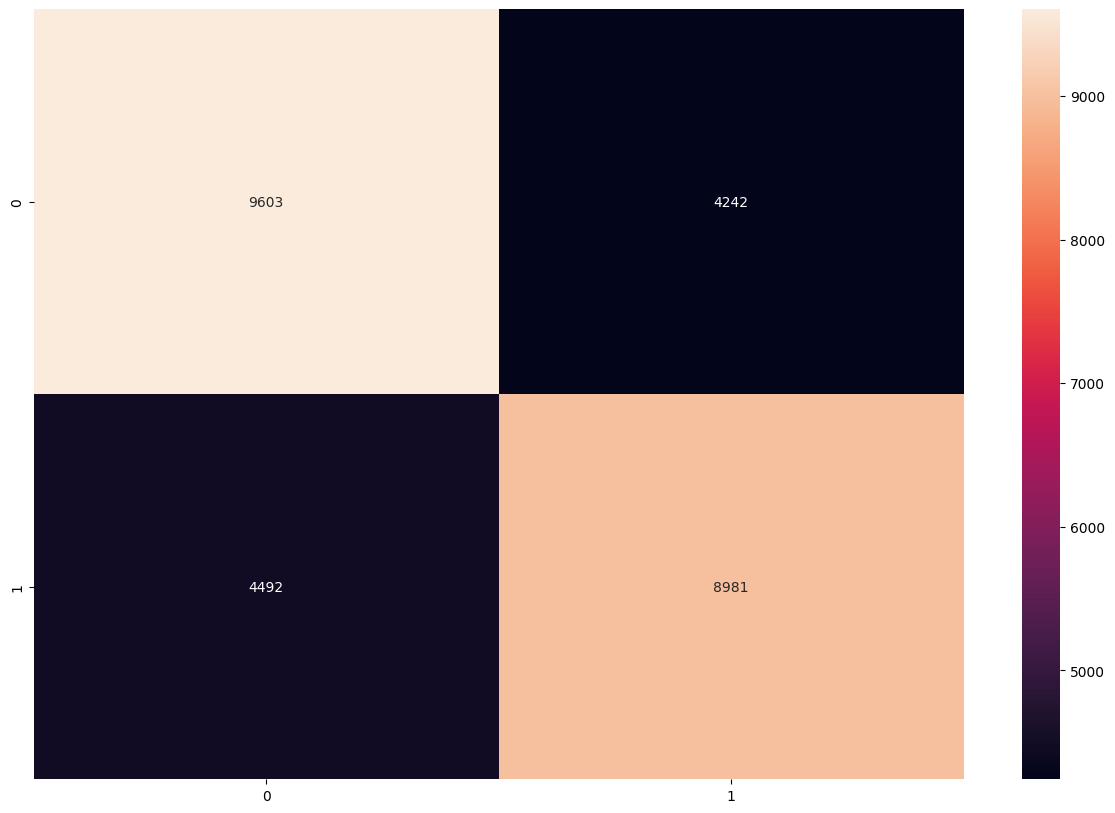

In [ ]:
# prompt: k nearest neigbours

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_y)
knn_pred = knn_model.predict(valid_X)
classificationSummary(valid_y, knn_pred)
cm = confusion_matrix(valid_y, knn_model.predict(valid_X))
sns.heatmap(cm,annot=True,fmt="d")
# plt.tight_layout()
plt.show()



Confusion Matrix (Accuracy 0.7203)

       Prediction
Actual     0     1
     0 10401  3444
     1  4196  9277


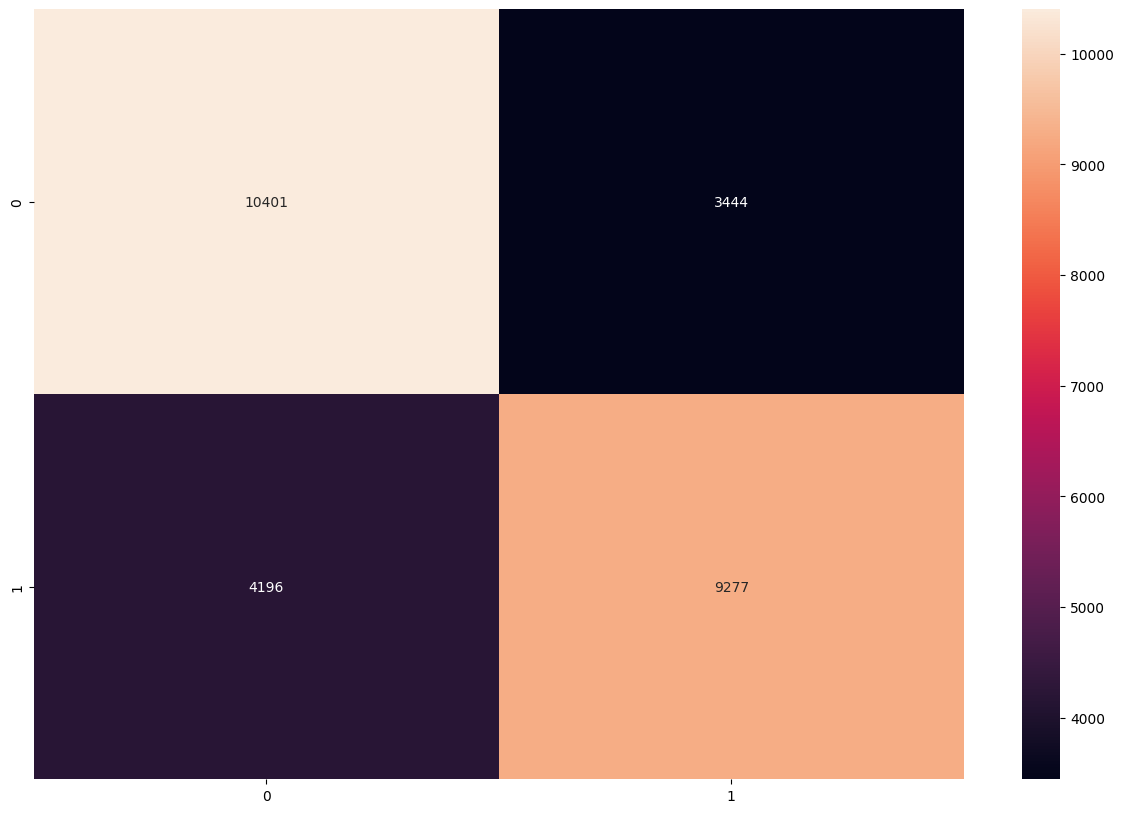

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=17, metric='euclidean')
knn_model.fit(train_X, train_y)
knn_model_pred = knn_model.predict(valid_X)
classificationSummary(valid_y, knn_model_pred)
cm = confusion_matrix(valid_y, knn_model.predict(valid_X))
sns.heatmap(cm,annot=True,fmt="d")
# plt.tight_layout()
plt.show()


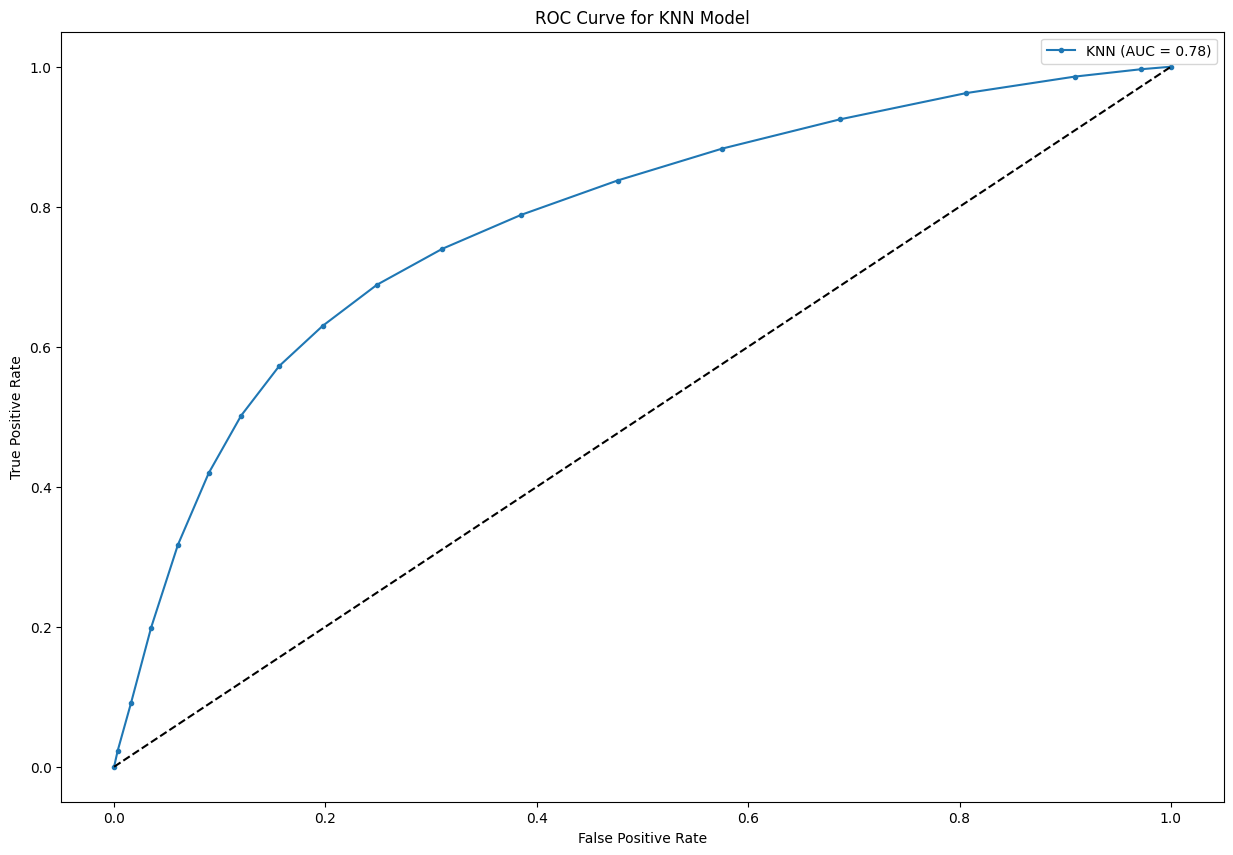

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# Calculate the ROC AUC score
knn_roc_auc = roc_auc_score(valid_y, knn_model.predict_proba(valid_X)[:,1])

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(valid_y, knn_model.predict_proba(valid_X)[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr, marker='.', label='KNN (AUC = %0.2f)' % knn_roc_auc)

# Add the baseline
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend()
# plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
print("Logistic Regression Model:")
print("Accuracy Score:", accuracy_score(valid_y, log_reg_pred))
print("ROC AUC Score:", roc_auc_score(valid_y, log_reg_pred))
print("\nRandom Forest Model:")
print("Accuracy Score:", accuracy_score(valid_y, random_forest_model_pred))
print("ROC AUC Score:", roc_auc_score(valid_y, random_forest_model_pred))
print("\nDecision Tree Model:")
print("Accuracy Score:", accuracy_score(valid_y, decision_tree_pred))
print("ROC AUC Score:", roc_auc_score(valid_y, y_prob))
print("\nKNN Model:")
print("Accuracy Score:", accuracy_score(valid_y, knn_pred))
print("ROC AUC Score:", knn_roc_auc)

Logistic Regression Model:
Accuracy Score: 0.7278717329233473
ROC AUC Score: 0.7270903590415854

Random Forest Model:
Accuracy Score: 0.7060180101032286
ROC AUC Score: 0.7058752391022566

Decision Tree Model:
Accuracy Score: 0.726334285086756
ROC AUC Score: 0.7868717331135126

KNN Model:
Accuracy Score: 0.6802840617907606
ROC AUC Score: 0.7772444719569015
